# K-means Segmentation

## Part I: Theoretical Analysis

#### Algebraic equivalence between two non-parametric formulations for K-means:
### $$  \sum_{k=1}^K \frac{\sum_{pq\in S^k}\|f_p-f_q\|^2}{2\;|S^k|} \;\;=\;\; const - \sum_{k=1}^K \frac{\sum_{pq\in S^k} \langle f_p,f_q\rangle}{|S^k|}$$

$Proof$:
$$  E(S) \;\;=\;\; \sum_{k=1}^K \frac{\sum_{pq\in S^k}\|f_p-f_q\|^2}{2\;|S^k|} \;\;=\;\; \sum_{k=1}^K \frac{\sum_{q\in S^k}\sum_{p\in S^k}\|f_p\|^2 + \sum_{p\in S^k}\sum_{q\in S^k}\|f_q\|^2 - 2 \langle \sum_{p\in S^k}f_p \;, \;\sum_{q\in S^k}f_q\rangle}{2\;|S^k|} $$

$$E(S) \;\;=\;\; \sum_{k=1}^K \frac{|S^k|\sum_{p\in S^k}\|f_p\|^2 + |S^k|\sum_{q\in S^k}\|f_q\|^2 - 2 \langle \sum_{p\in S^k}f_p \;, \;\sum_{q\in S^k}f_q\rangle}{2\;|S^k|} $$

From the distributive property of dot product, we have,

$$E(S) \;\;=\;\; \sum_{k=1}^K \frac{2\;|S^k|\sum_{p\in S^k}\|f_p\|^2 - 2 \sum_{pq\in S^k}\langle f_p \;, \;f_q\rangle}{2\;|S^k|} $$

$$E(S) \;\;=\;\; \sum_{k=1}^K \sum_{p\in S^k}\|f_p\|^2 - \sum_{k=1}^K \frac{ \sum_{pq\in S^k}\langle f_p \;, \;f_q\rangle}{|S^k|} $$

$$E(S) \;\;=\;\; \sum_{p\in S}\|f_p\|^2 - \sum_{k=1}^K \frac{ \sum_{pq\in S^k}\langle f_p \;, \;f_q\rangle}{|S^k|} $$

Where the term $\sum_{p\in S}\|f_p\|^2$ is invariant to ways of clustering. Therefore, 

$$E(S) \;\;=\;\; const - \sum_{k=1}^K \frac{ \sum_{pq\in S^k}\langle f_p \;, \;f_q\rangle}{|S^k|} $$

### Simple finite-dimensional version of Mercer theorem
#### Let $A$ be an $n\times n$ positive semi-definite matrix defining pairwise affinities between $n$ ponts. The below shows a closed expression for $n$ vectors $\phi_i$  (a so-called "Euclidean embedding") such that their Euclidean dot products agree with the given affinites, i.e. $\langle \phi_i,\phi_j\rangle = A_{ij}$ for all $1\leq i,j\leq n$. Assuming known eigen-decomposition $A=Q\Lambda Q^T$ where $Λ=diag(λ_1,…,λ_n)$ is a diagonal matrix of (non-negative!) eigen-values and $Q$ is an orthogonal $n\times n$ matrix whose columns $Q_i$ are unit eigen-vectors of $A$.

Since $A$ is a $n\times n$ positive semi-definite matrix, the eigenvalues of A are non-negative. So $\lambda_i \geq 0, i \in [1, n]$.

We can now rewrite the eigen-decoposition as $A=Q\Lambda^{\frac{1}{2}} {\Lambda^{\frac{1}{2}}}^TQ^T = \Phi^T \Phi$, 

where $\Lambda^{\frac{1}{2}} = {\Lambda^{\frac{1}{2}}}^T = diag(\sqrt{λ_1},…,\sqrt{λ_n})$, and $\Phi = {\Lambda^{\frac{1}{2}}}^T Q^T = [\phi_1,...\phi_n]$

$A = \Phi^T \Phi =
\begin{bmatrix}
\phi_1 \\
\vdots \\
\phi_n
\end{bmatrix}
[\phi_1 , \dots , \phi_n] = 
\begin{bmatrix}
\langle \phi_1, \phi_1\rangle & \dots & \langle \phi_1, \phi_n\rangle \\
\vdots & \ddots & \vdots\\
\langle \phi_n, \phi_1\rangle & \dots & \langle \phi_n, \phi_n\rangle
\end{bmatrix}$

where $\phi_i={\Lambda^{\frac{1}{2}}}^T Q^T[1:n, \;i]$

### Low-dimenstional Euclidean embedding approximation
#### Assume that $\tilde{A}$ is a low-rank approximation of matrix $A$ in problem 2 of given rank $m<n$. That is, $\tilde{A} = Q\Lambda_m Q^T$ where $\Lambda_m=diag(\lambda_1,\dots,\lambda_m,0,\dots,0)$ is a diagonal matrix of the largest $m$ eigen values of $A$ (a la Eckart–Young–Mirsky theorem). The derivation below specifies a formula for "Euclidean embedding" $\{\tilde{\phi}_i\}$ such that $\langle \tilde{\phi}_i,\tilde{\phi}_j\rangle = \tilde{A}_{ij}$ and $\tilde{\phi}_i \in {\cal R}^m$.
#### Comment: basic K-means (Lloyd's algorithm) over such points $\{\tilde{\phi}_i\}$ can be used as an approximate algorithm for kernel clusterng (e.g. for average association criteria). This approach is an example of "spectral clustering", which uses eigen decomposition of the affinity matrix $A$.

Let $Q=[v_1,  \dots , v_n]$, then $\Phi={{\Lambda_m}^{\frac{1}{2}}}^T Q^T=
\begin{bmatrix}
\sqrt{\lambda_1}v_1 \\
\vdots \\
\sqrt{\lambda_m}v_m \\
\vec{0} \\
\vdots \\
\vec{0}
\end{bmatrix}=
\begin{bmatrix}
\tilde\phi_1 & \dots &  \tilde\phi_n\\
0 & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & 0
\end{bmatrix}=
\begin{bmatrix}
\tilde\phi_{11} & \dots &  \tilde\phi_{n1}\\
\vdots & \ddots & \vdots \\
\tilde\phi_{1m} & \dots &  \tilde\phi_{nm}\\
0 & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & 0
\end{bmatrix}$.

$\tilde A = \Phi^T\Phi =
\begin{bmatrix}
\tilde\phi_{11} & \dots &  \tilde\phi_{1m} & 0 & \dots & 0\\
\vdots          & \ddots& \vdots          & \vdots & \ddots& \vdots\\
\tilde\phi_{n1} & \dots &  \tilde\phi_{nm} & 0 & \dots & 0
\end{bmatrix}
\begin{bmatrix}
\tilde\phi_{11} & \dots &  \tilde\phi_{n1}\\
\vdots & \ddots & \vdots \\
\tilde\phi_{1m} & \dots &  \tilde\phi_{nm}\\
0 & \dots & 0 \\
\vdots & \ddots & \vdots \\
0 & \dots & 0
\end{bmatrix}=
\begin{bmatrix}
\tilde\phi_{11} & \dots &  \tilde\phi_{1m}\\
\vdots & \ddots & \vdots \\
\tilde\phi_{n1} & \dots &  \tilde\phi_{nm}
\end{bmatrix}
\begin{bmatrix}
\tilde\phi_{11} & \dots &  \tilde\phi_{n1}\\
\vdots & \ddots & \vdots \\
\tilde\phi_{1m} & \dots &  \tilde\phi_{nm}
\end{bmatrix}=
\begin{bmatrix}
\langle \tilde\phi_1, \tilde\phi_1\rangle & \dots & \langle \tilde\phi_1, \tilde\phi_n\rangle \\
\vdots & \ddots & \vdots\\
\langle \tilde\phi_n, \tilde\phi_1\rangle & \dots & \langle \tilde\phi_n, \tilde\phi_n\rangle
\end{bmatrix}
$

where $\tilde\phi_i={{\Lambda_m}^{\frac{1}{2}}}^T Q^T[1:m, \;i]$



## Part II: Implementation

 #### The implementation of the main two steps of K-means algorithm use RGBXY features. Relative contribution of "squared errors" from XY features is set by parameter "weightXY" (or self.w inside MyKmeansApp), so that the squared error between RGBXY feture $F_p=[R_p,G_p,B_p,X_p,Y_p]$ at any pixel $p$ and any given cluster mean $m=[R_m,G_m,B_m,X_m,Y_m]$ is 
#### $$||F_p - m||^2 = (R_p - R_m)^2 + (G_p - G_m)^2 + (B_p - B_m)^2 + w \cdot (X_p-X_m)^2 + w \cdot (Y_p-Y_m)^2.$$
#### The "KmeansPresenter" visulaizes the segmentation results (cluster labels mask) where each cluster is highlighted either by some  random color (press r-key) or by the "mean" segment color (press m-key). All keys that "KmeansPresenter" responds to are as follows: 

1. press 'i'-key for each (i)teration of K-means 
2. press 'c'-key to run K-means to (c)onvergence (when energy improvement is less than given threshold)
3. press 'v'-key to run K-means to convergence with (v)isualization of each iteration
4. press 'r'-key to start over from (r)andom means
5. press 's'-key to change to a random (s)olid color-palette for displaying clusters
6. press 't'-key to change to a random (t)ransparent palette for displaying clusters
7. press 'm'-key to change to the (m)ean-color palette for displaying clusters

In [1]:
%matplotlib notebook
# loading standard modules
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2grey

# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1_error_handling import Figure, KmeansPresenter

In [2]:
class MyKmeansApp:

    def __init__(self, img, num_clusters=2, weightXY=1.0):
        self.k = num_clusters
        self.w = weightXY
        self.iteration = 0  # iteration counter
        self.energy = np.infty  # energy - "sum of squared errors" (SSE)

        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]

        self.im = img

        self.means = np.zeros((self.k, 5), 'd')  # creates a zero-valued (double) matrix of size Kx5
        self.init_means()

        self.no_label = num_clusters  # special label value indicating pixels not in any cluster (e.g. not yet)

        # mask "labels" where pixels of each "region" will have a unique index-label (like 0,1,2,3,..,K-1)
        # the default mask value is "no-label" (K) implying pixels that do not belong to any region (yet)
        self.labels = np.full((num_rows, num_cols), fill_value=self.no_label, dtype=np.int)
        self.super_images()

        self.fig = Figure()
        self.pres = KmeansPresenter(img, self)
        self.pres.connect_figure(self.fig)

    def run(self):
        self.fig.show()

    def init_means(self):
        self.iteration = 0  # resets iteration counter
        self.energy = np.infty  # and the energy

        poolX = range(self.num_cols)
        poolY = range(self.num_rows)

        # generate K random pixels (Kx2 array with X,Y coordinates in each row)
        random_pixels = np.array([np.random.choice(poolX, self.k), np.random.choice(poolY, self.k)]).T

        for label in range(self.k):
            self.means[label, :3] = self.im[random_pixels[label, 1], random_pixels[label, 0], :3]
            self.means[label, 3] = random_pixels[label, 0]
            self.means[label, 4] = random_pixels[label, 1]
            
    # This function convert expand the original pixels to "super pixels" by append x, y coordinate
    # to each pixel (after RGB channels).
    def super_images(self):
        x_coords = np.array(list(range(self.num_cols)) * self.num_rows) # [0,1,...,num_cols,0,1,...,num_cols,...]
        y_coords = np.repeat(list(range(self.num_rows)), self.num_cols) # [0,0,...,0,1,1...,1,...,num_rows,..,num_rows]
        coords = np.array(list(zip(x_coords, y_coords))).reshape(self.num_rows, self.num_cols, 2) # [(0,0),(1,0),...,(num_cols,0),(1,0),...,(num_cols, num_rows)]
        self.super_im = np.append(self.im, coords, axis=2).astype(np.int) # [(R,G,B,X,Y),...]

    # This function compute average values for R, G, B, X, Y channel (feature component) at pixels in each cluster
    # represented by labels in given mask "self.labels" storing indeces in range [0,K). The averages should benum_cols
    # saved in (Kx5) matrix "self.means". The return value should be the number of non-empty clusters.
    def compute_means(self):
        labels = self.labels
        non_empty_clusters = 0
        for i in range(self.k):
            index = labels == i # label mask for label i
            if np.count_nonzero(index) != 0:
                non_empty_clusters += 1
                self.means[i] = np.average(self.super_im[index], axis=0)
            # For empty clusters set the corresponding mean values to infinity (np.infty).
            else:
                self.means[i] = np.full(5, np.infty)
        # Report the correct number of non-empty clusters
        return non_empty_clusters

    # The segmentation mask is used by KmeanPresenter to paint segments in distinct colors
    # NOTE: valid region labels are in [0,K), but the color map in KmeansPresenter
    #       accepts labels in range [0,K] where pixels with no_label=K are not painted/colored.
    def get_region_mask(self):
        return self.labels

        # This function computes optimal (cluster) index/label in range 0,1,...,K-1 for pixel x,y based on

    # given current cluster means (self.means). The functions should save these labels in "self.labels".
    # The return value should be the corresponding optimal SSE.
    def compute_labels(self):
        # K layers distance matrix, each layer i stores squared distance between pixels and the corresponding mean_i
        k_dist = np.zeros((self.k, self.num_rows, self.num_cols))
        weight = np.array([1, 1, 1, self.w, self.w])
        for i in range(self.k):
            k_dist[i] = np.sum((self.super_im - self.means[i]) ** 2 * weight, axis=2) 
        # For each pixel p, find i s.t. dist(p, mean_i) is minimal.
        opt_labels = np.argmin(k_dist, axis=0) # Store i's into opt_labels
        min_dist = np.amin(k_dist, axis=0) # Store dist(p, mean_i)'s' into min_dist
        # update the labels based on opt_labels computed above
        self.labels = opt_labels
        # returns the optimal SSE (corresponding to optimal clusters/labels for given means)
        return min_dist.sum()

    # The function below is called by "on_key_down" in KmeansPresenter".
    # It's goal is to run an iteration of K-means procedure
    # updating the means and the (segment) labels
    def compute_k_means_clusters(self):
        self.iteration += 1

        # the main two steps of K-means algorithm
        energy = self.compute_labels()
        num_clusters = self.compute_means()

        # computing improvement and printing some information
        num_pixels = self.num_rows * self.num_cols
        improve_per_pixel = (self.energy - energy) / num_pixels
        energy_per_pixel = energy / num_pixels
        self.energy = energy

        self.fig.ax.text(0, -8,  # text location
                         'iteration = {:_>2d},  clusters = {:_>2d},  SSE/p = {:_>7.1f},   improve/p = {:_>7.3f}    '.format(
                             self.iteration, num_clusters, energy_per_pixel, improve_per_pixel),
                         bbox={'facecolor': 'white', 'edgecolor': 'none'})
        print(energy_per_pixel)
        return improve_per_pixel

## Part III: Visualization and Discussion

### Discussion on parameter K:

When the number of clusters is set to a higher value (e.g. 80), the resultant graph is effectively a color quantization with regularization. Since each cluster is small, its mean could accurately represent pixels within the same cluster. Therefore, the optimal SSE per pixels is relatively samll (626.1 vs 8823.7). 

However, over-segmented graph could overfit the image, which might leads to loss of generality. In other words, it becomes difficult to interpret the sematic meaning of each cluster.

On the other hand, the small number of clusters yields large energy, which is expected since we use fewer means to summarize the image. But each cluster has more sematic meaning (e.g. the yellow cluster in the second graph is the segment of the flower). Moreover, it requires fewer steps to converge (17 vs 70).

<IPython.core.display.Javascript object>


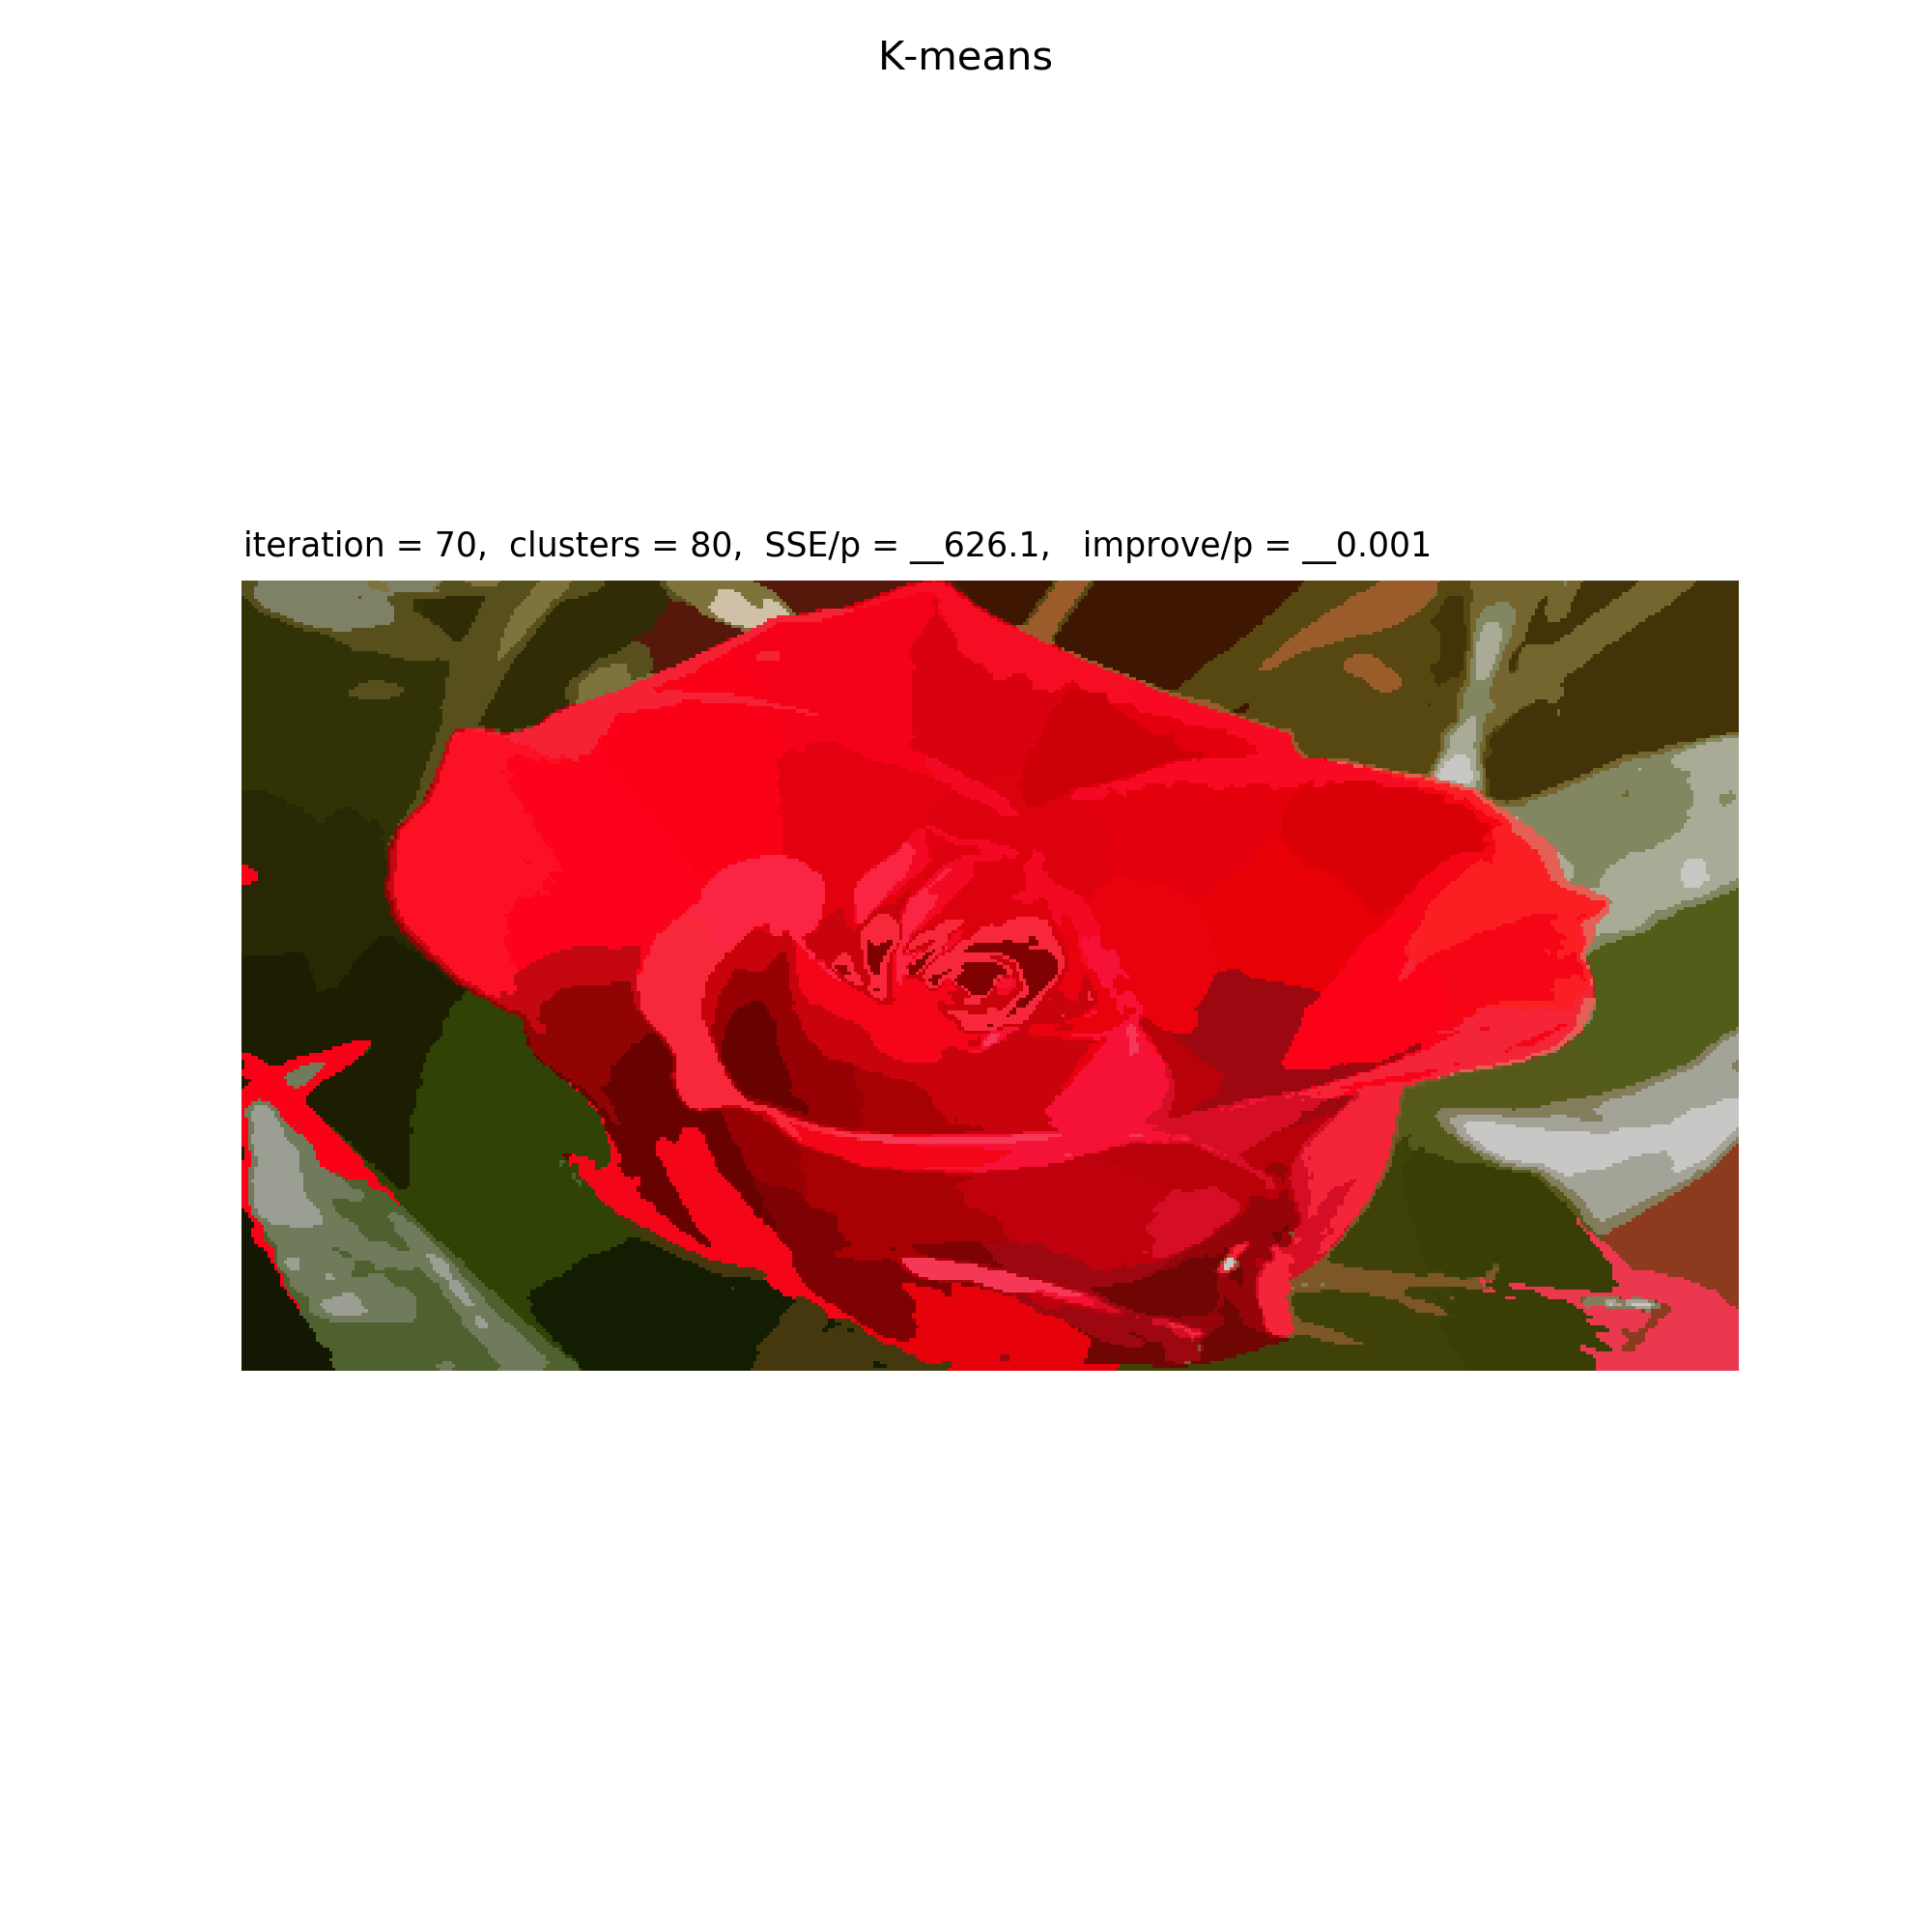

In [5]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=80, weightXY=0.5)
app.run()

<IPython.core.display.Javascript object>


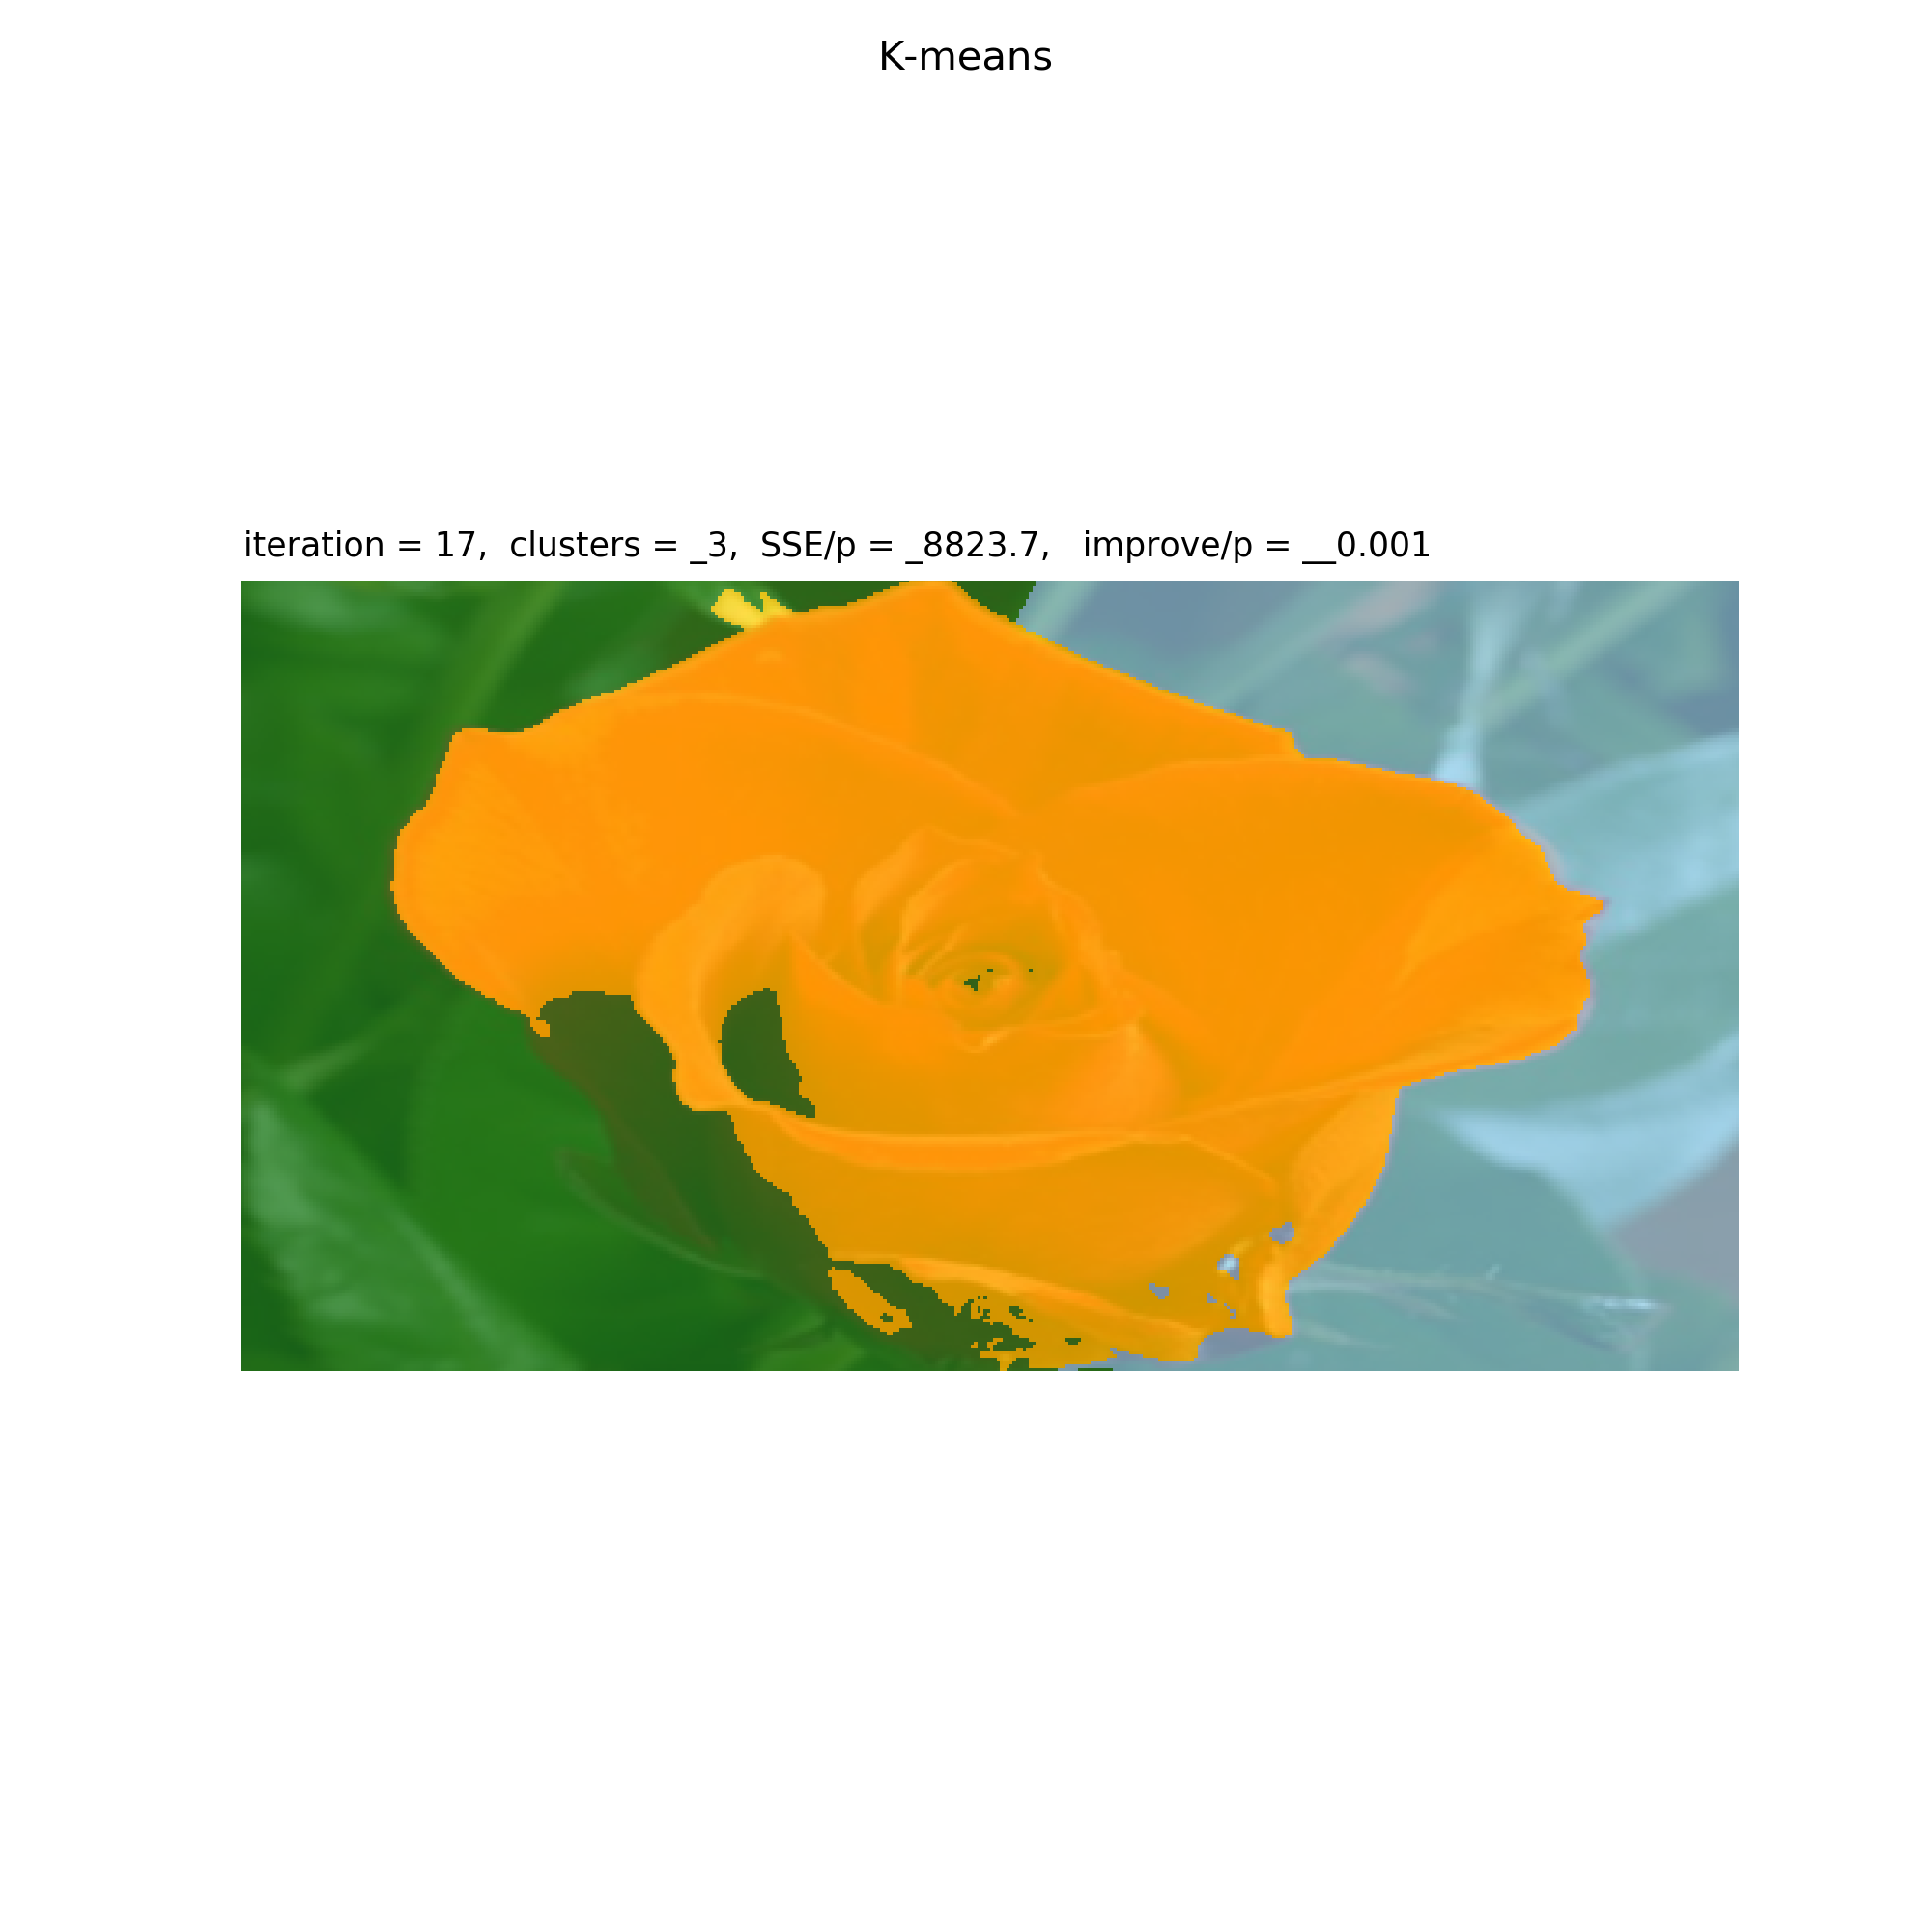

In [12]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=3, weightXY=0.5)
app.run()

### Discussion on parameter weightXY:

If we increase the weight of spatial consistency from 0.5 to 3, we observe that the output put less emphasis on color consistency and penalize more on distant pixels. From the graph below, the generated clusters tend to be blob-like where pixels in the same cluster are very close. However, it cannot perform very well for backgroud pixels that are consistent but far away from each other.

<IPython.core.display.Javascript object>


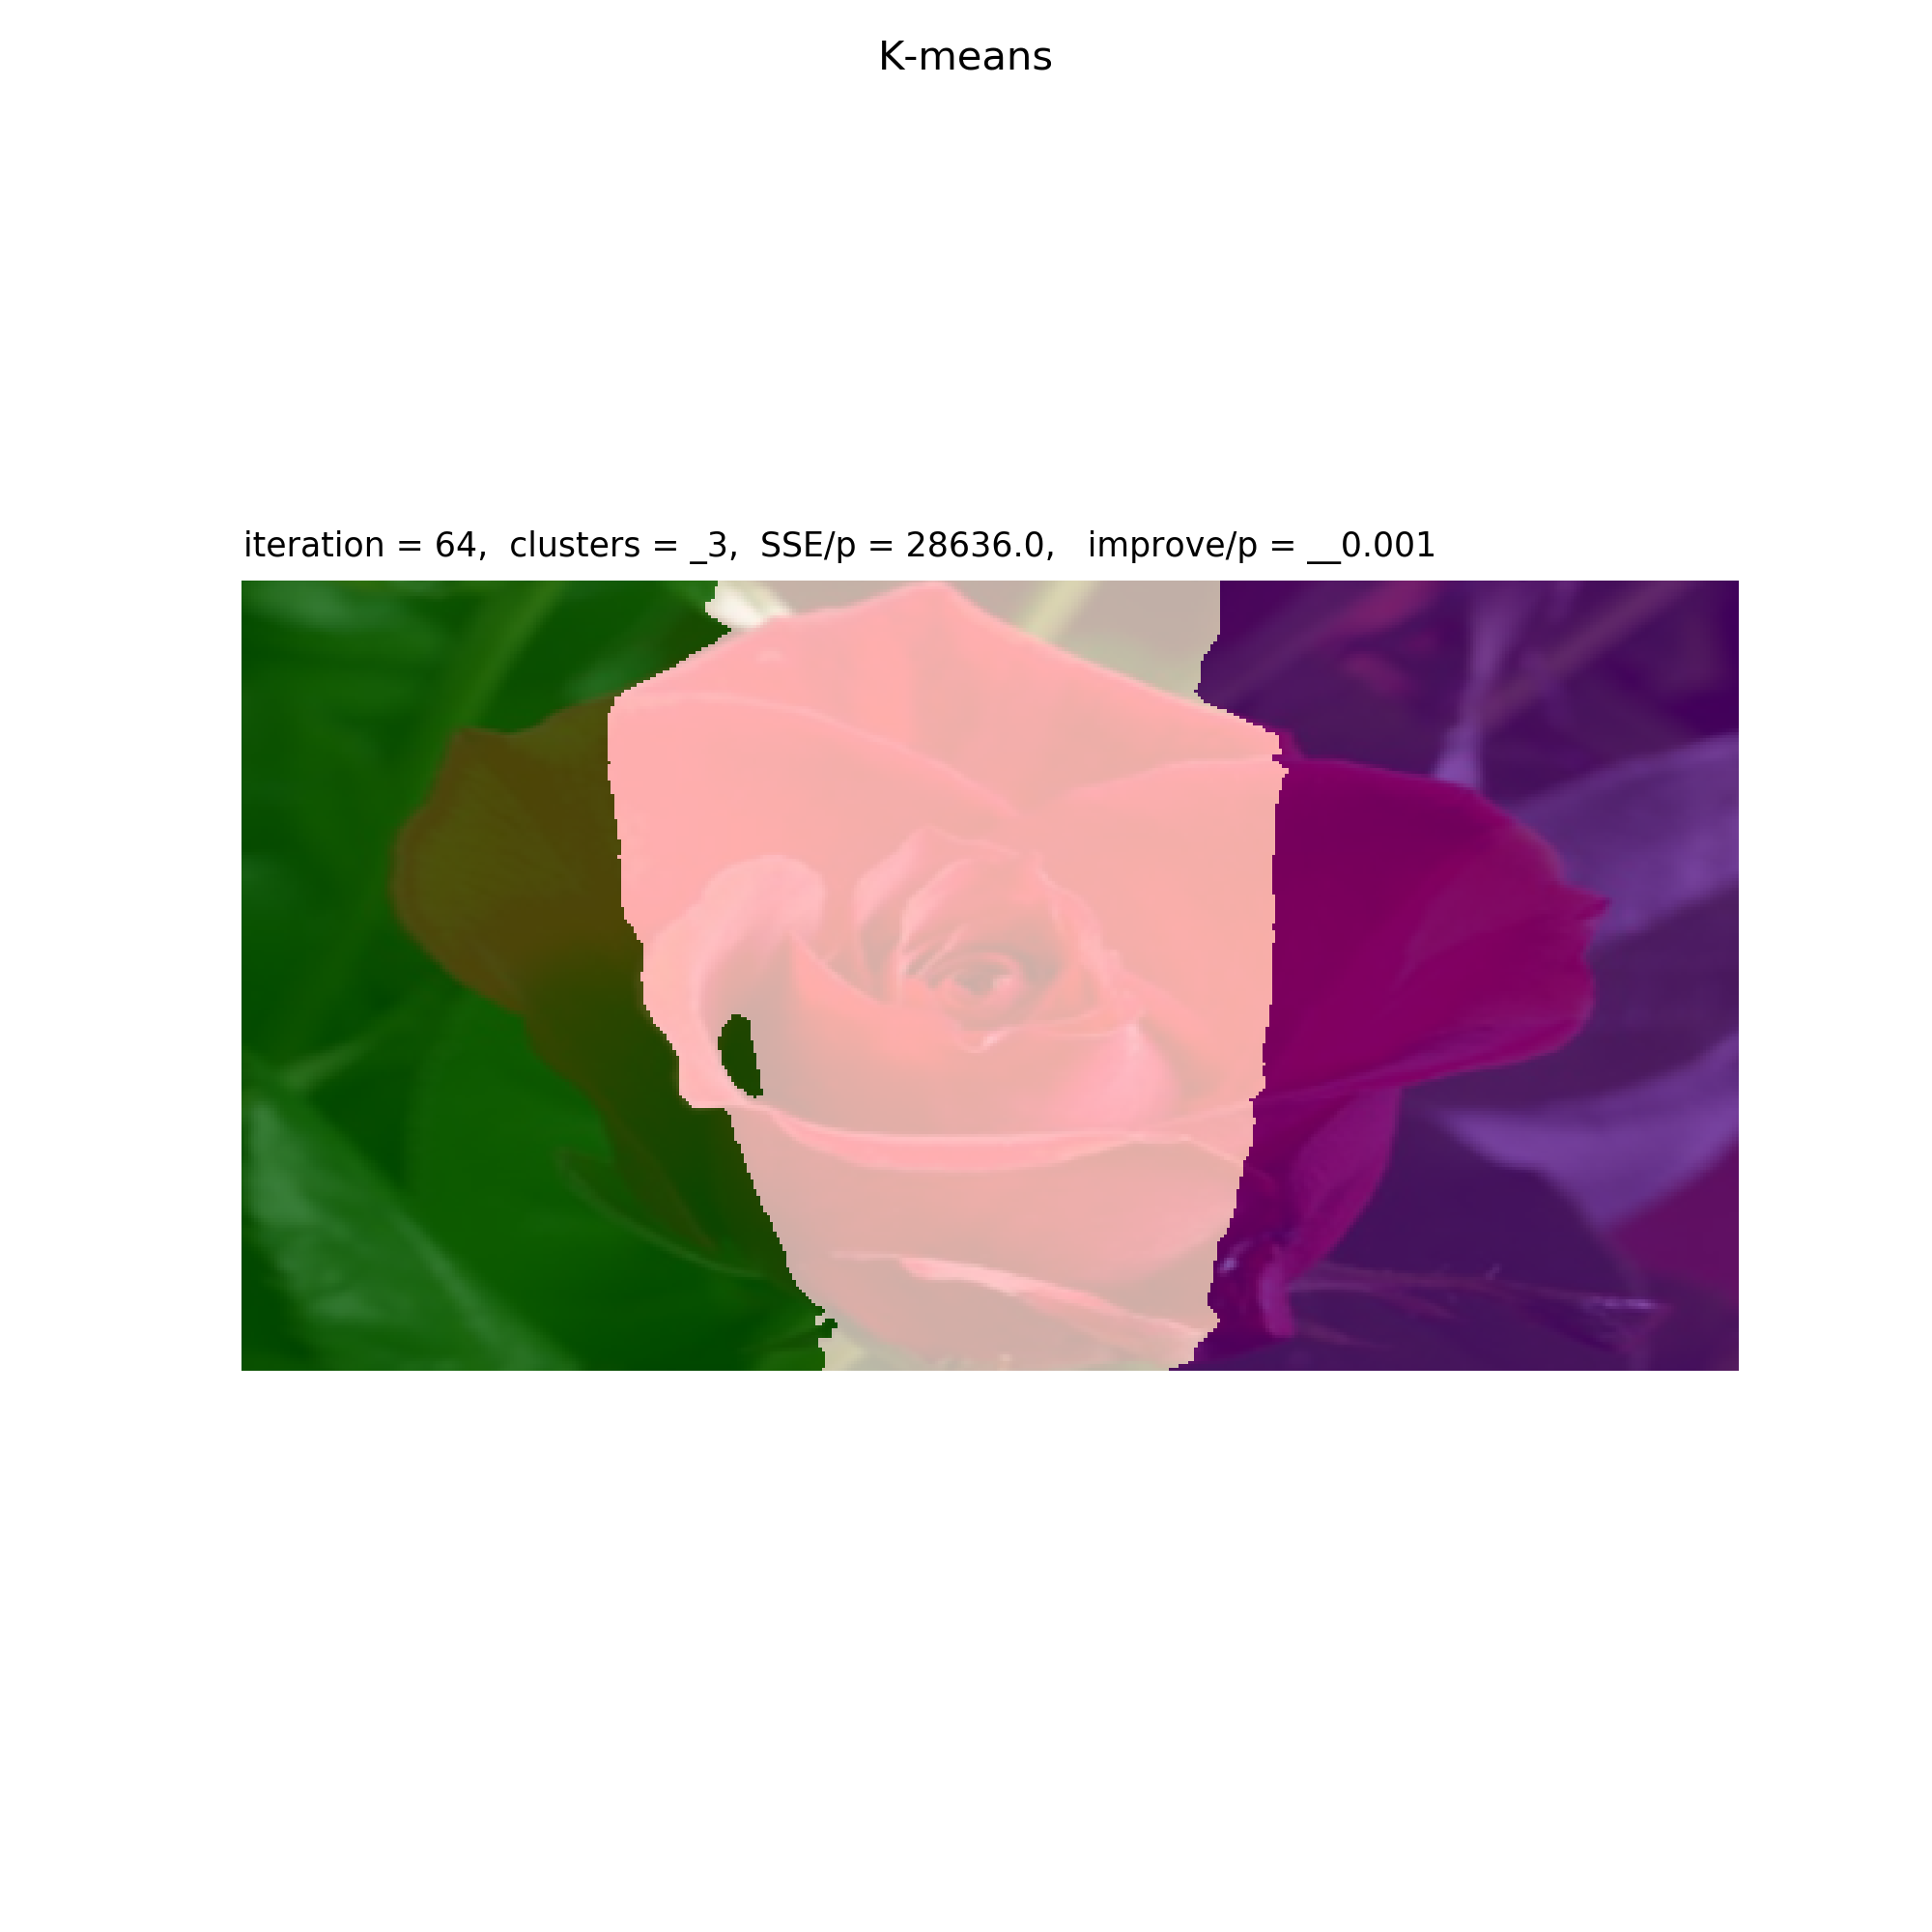

In [11]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=3, weightXY=3)
app.run()

### Discussion on local minima problem:
The two images below illustrate the local minima problem for K-means clustering. They both have the same hyperparameters and stopping criterion (energy improvement < 0.001) but different random initial means. The first graph successfully identified the flower from the backgroud. The second graph failed by merging the flower with the right background.

<IPython.core.display.Javascript object>


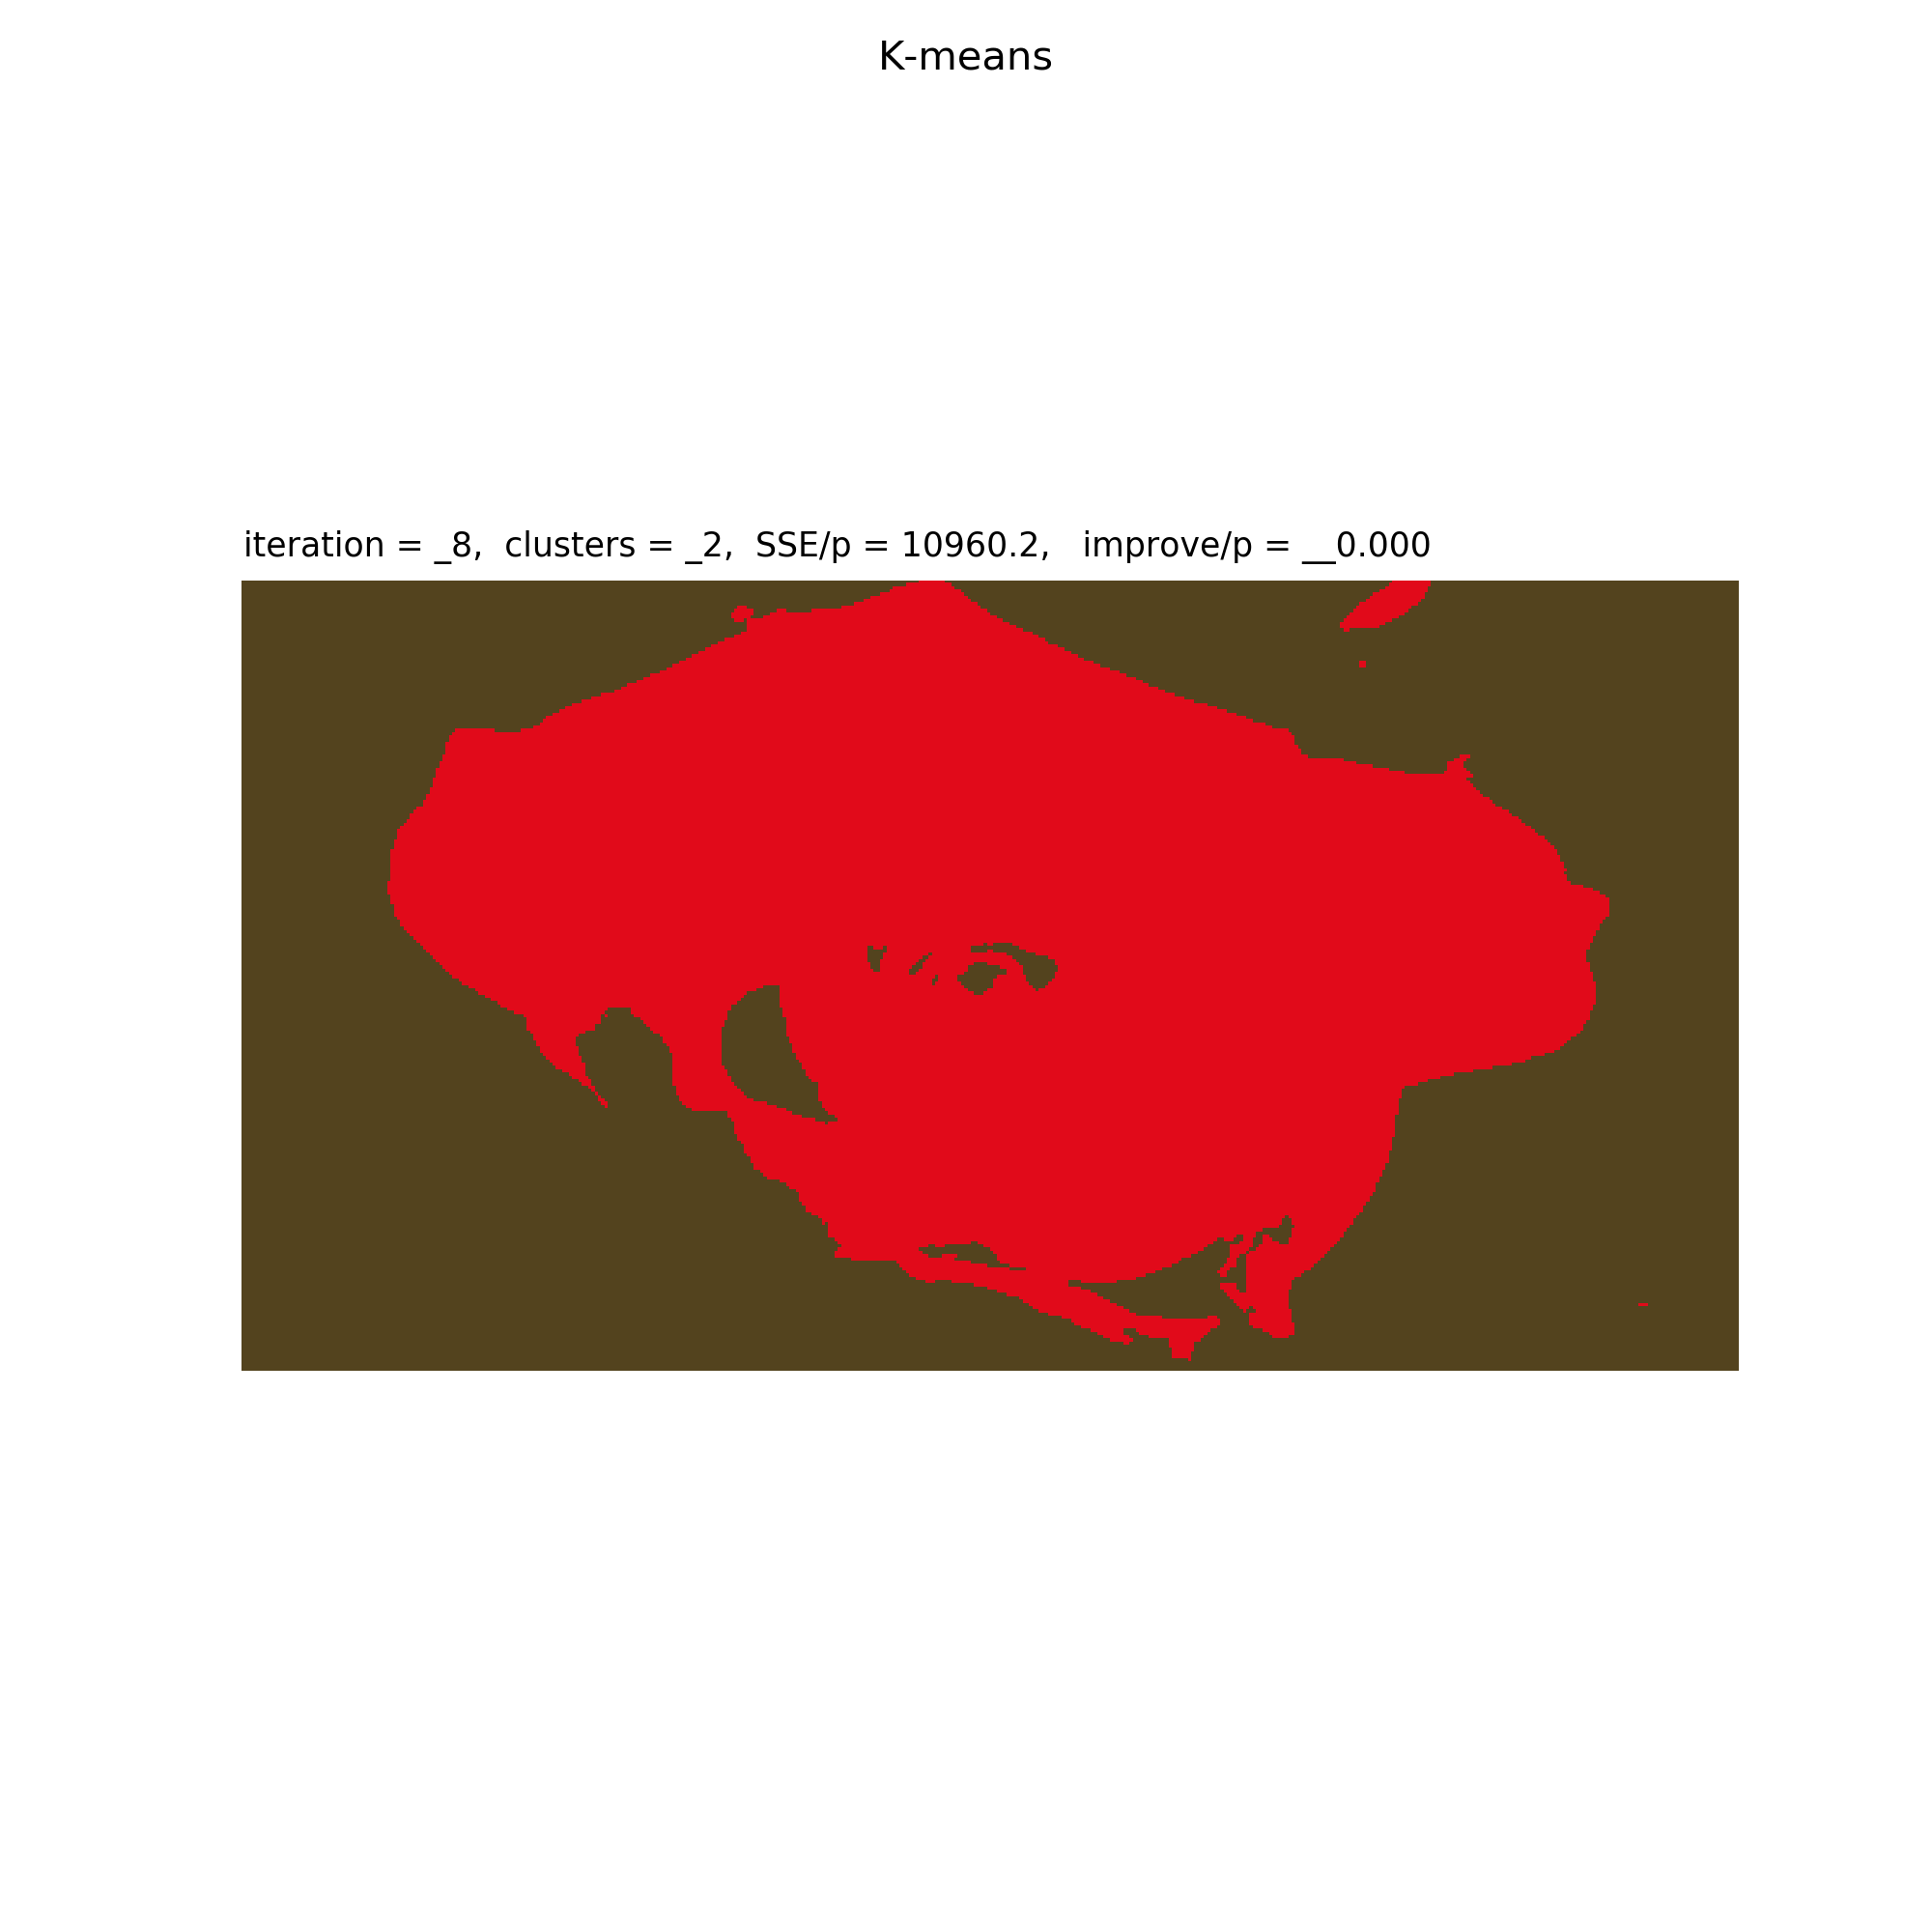

In [26]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=2, weightXY=0.3)
app.run()

<IPython.core.display.Javascript object>


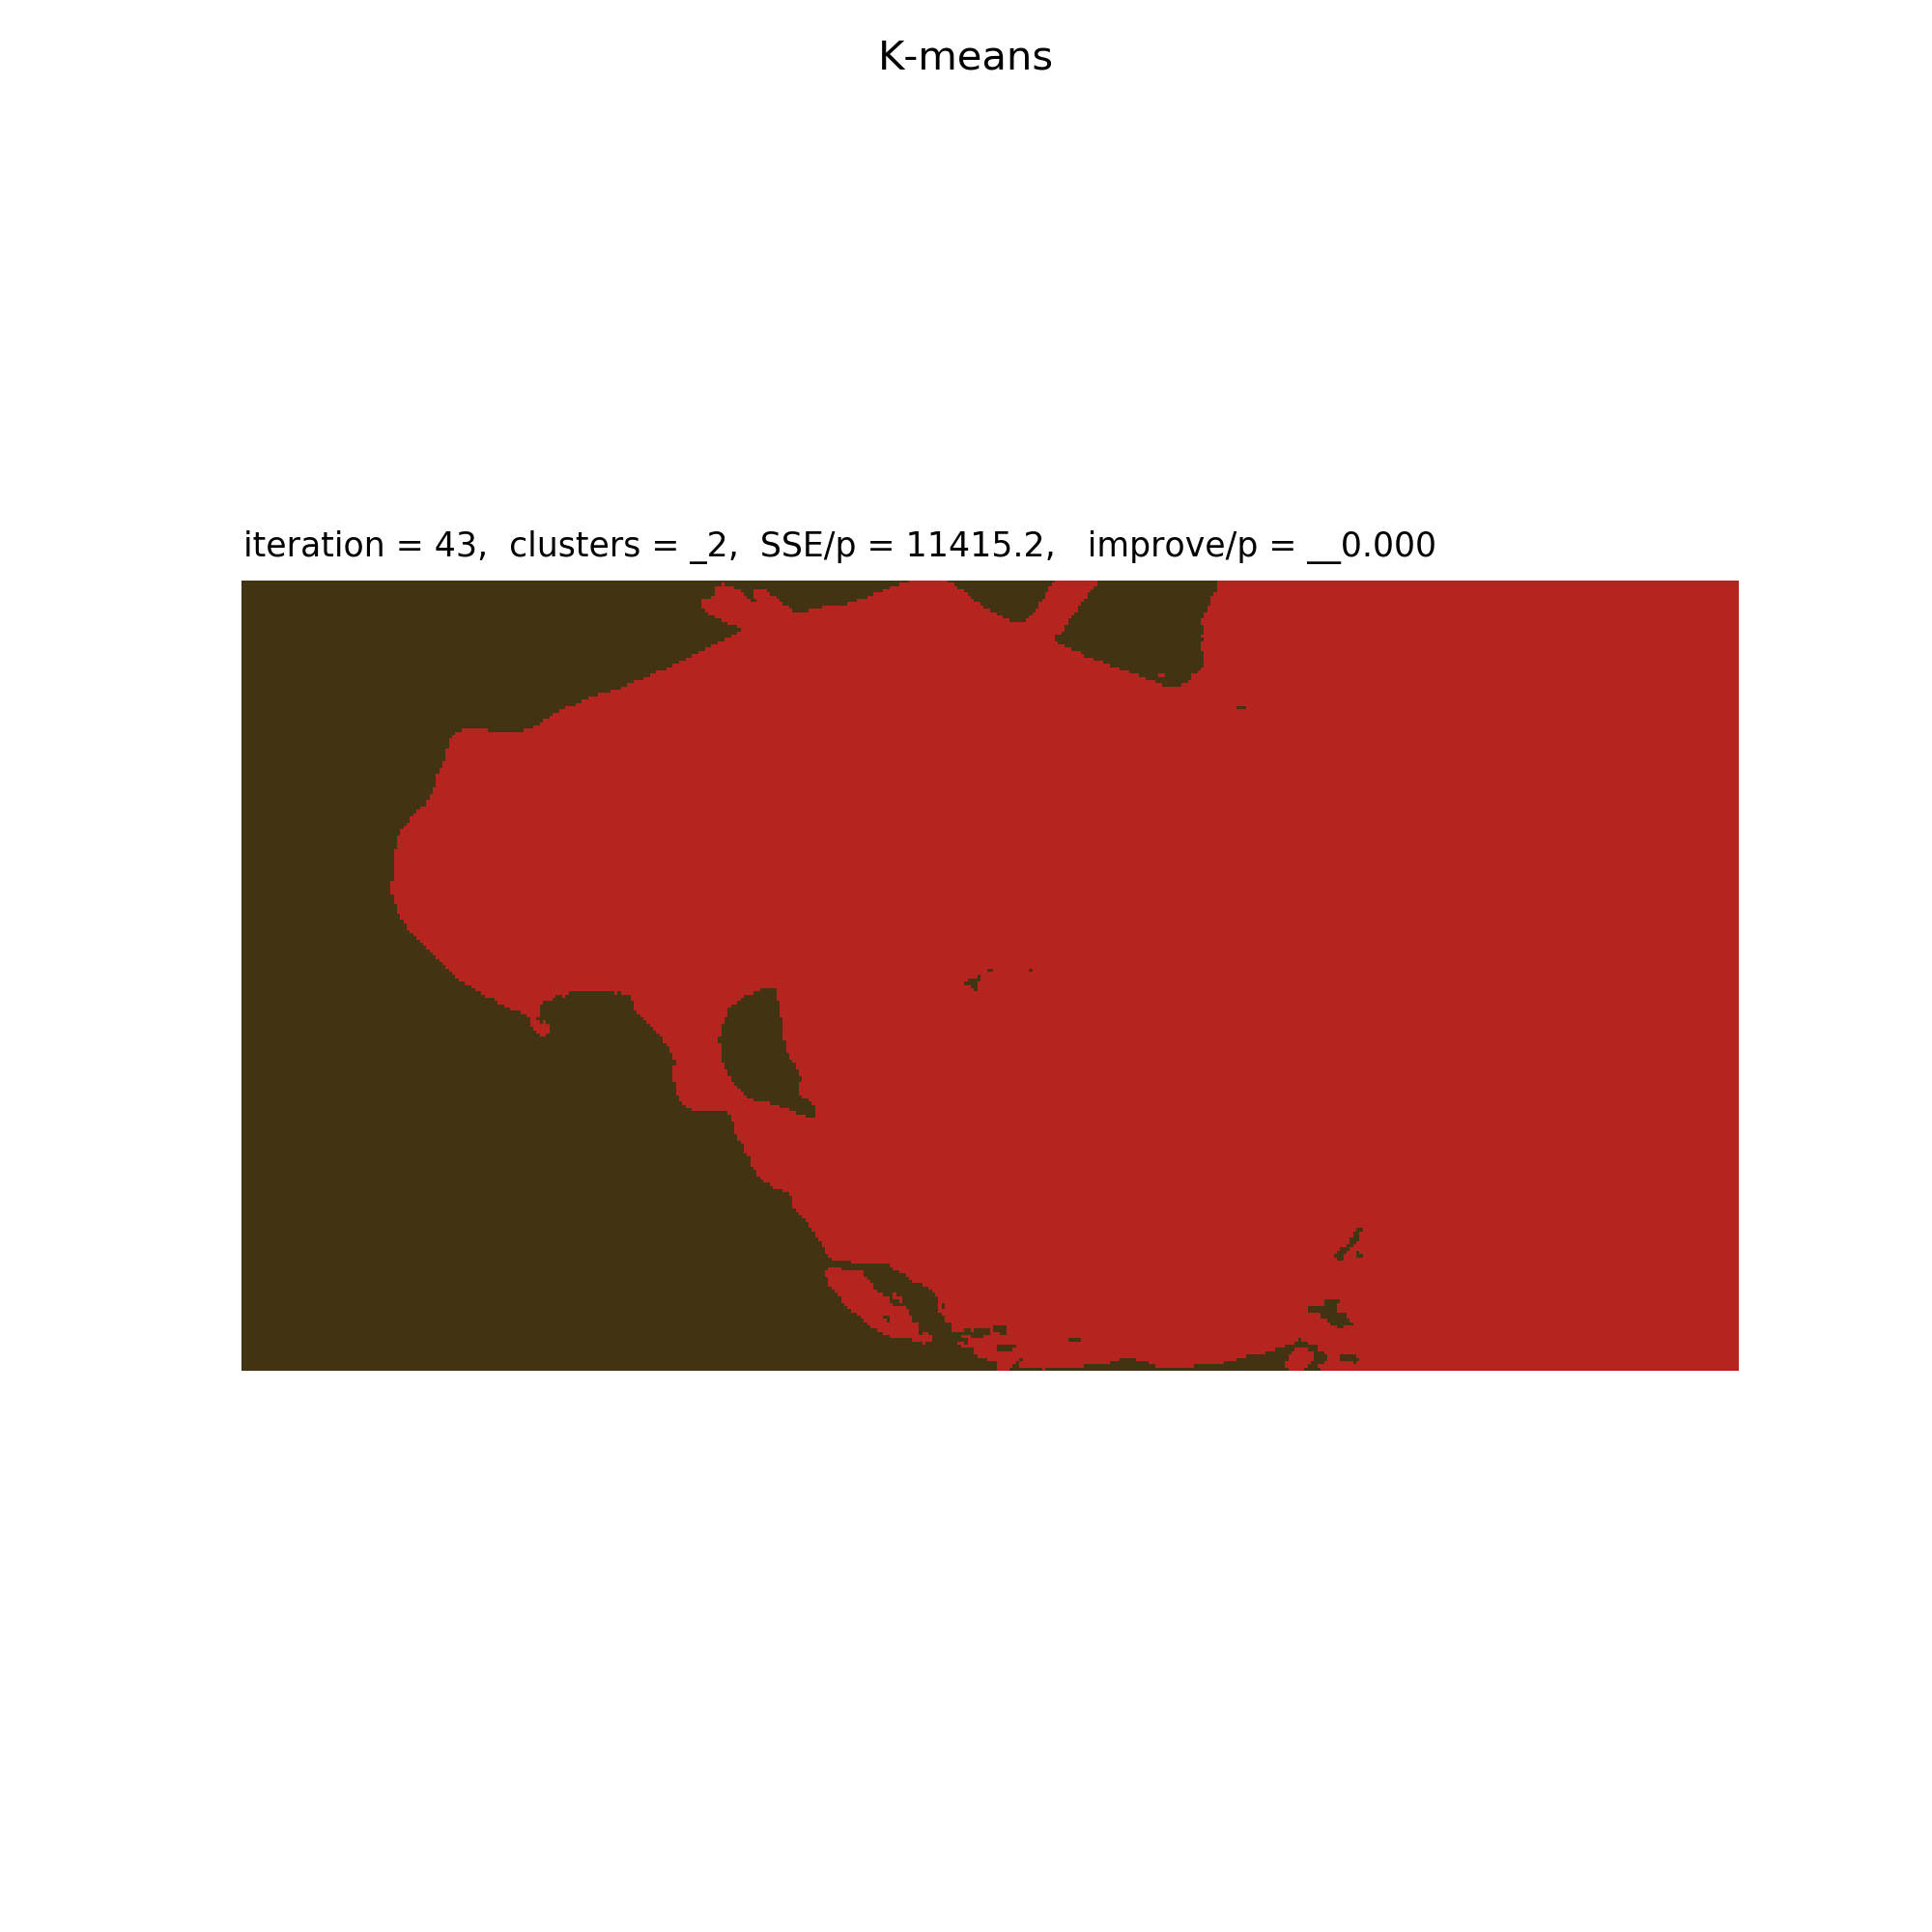

In [24]:
img = plt.imread('images/rose.bmp')
app = MyKmeansApp(img, num_clusters=2, weightXY=0.3)
app.run()